# Boston 주택 가격 예측 모델

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))

363
41
102


In [3]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) /std
val_data = (val_data - mean)/std
test_data = (test_data-mean)/std

In [4]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(13, )))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-03-08 17:08:18.794132: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-08 17:08:18.794155: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-08 17:08:18.794164: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-08 17:08:18.794217: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-08 17:08:18.794229: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


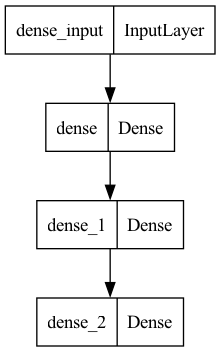

In [5]:
utils.plot_model(model)

In [6]:
from tensorflow.keras import callbacks
# check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
#                                            save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

In [7]:
train_data.shape, test_data.shape

((363, 13), (102, 13))

In [8]:
history = model.fit(train_data,train_labels,epochs=1000,batch_size = 20,validation_data=(val_data,val_labels),callbacks=[ early_stopping_cb])

Epoch 1/1000
 1/19 [>.............................] - ETA: 5s - loss: 460.2657 - mae: 20.1740

2024-03-08 17:08:19.265354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 1s 24ms/step - loss: 572.1957 - mae: 22.0902 - val_loss: 433.2160 - val_mae: 19.6185
Epoch 2/1000
19/19 [==============================] - 0s 9ms/step - loss: 568.5918 - mae: 22.0213 - val_loss: 430.4521 - val_mae: 19.5492
Epoch 3/1000
19/19 [==============================] - 0s 9ms/step - loss: 567.0210 - mae: 21.9832 - val_loss: 427.7877 - val_mae: 19.4755
Epoch 4/1000
19/19 [==============================] - 0s 10ms/step - loss: 565.9620 - mae: 21.9538 - val_loss: 426.2014 - val_mae: 19.4295
Epoch 5/1000
19/19 [==============================] - 0s 9ms/step - loss: 565.3124 - mae: 21.9360 - val_loss: 424.8462 - val_mae: 19.3912
Epoch 6/1000
19/19 [==============================] - 0s 9ms/step - loss: 564.3363 - mae: 21.9105 - val_loss: 423.5126 - val_mae: 19.3564
Epoch 7/1000
19/19 [==============================] - 0s 9ms/step - loss: 563.3895 - mae: 21.8887 - val_loss: 421.2740 - val_mae: 19.2891
Epoch 8/1000
19/19 [=========================

In [9]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

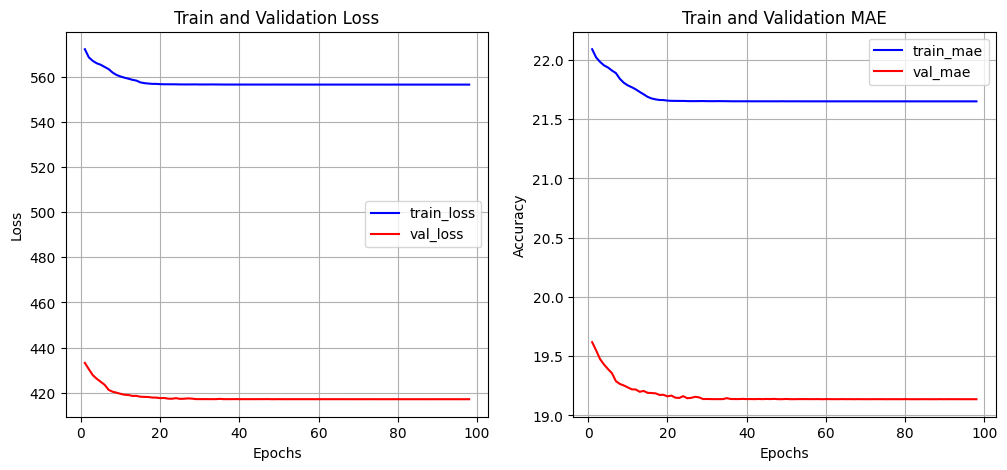

In [10]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
#plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [11]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 14ms/step - loss: 570.7066 - mae: 22.0786


[570.7066040039062, 22.078556060791016]

# Reuters

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000, test_split=0.2)

# 데이터를 훈련 세트와 검증 세트로 분할 (훈련 데이터의 25%를 검증 데이터로 사용)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [13]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

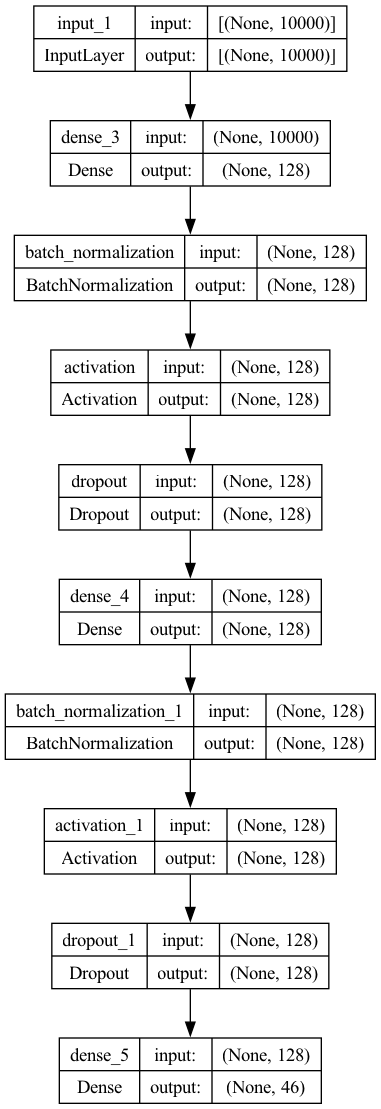

In [14]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model,Input
class reuters_model(Model):
    def __init__(self, **kwargs):
        super(reuters_model, self).__init__()
        self.d1 = layers.Dense(128,activation ='relu')
        self.bn1 = layers.BatchNormalization()
        self.a1 = layers.Activation('relu')
        self.dp1 = layers.Dropout(rate=0.2)
        self.d2 = layers.Dense(128,activation ='relu')
        self.bn2 = layers.BatchNormalization()
        self.a2 = layers.Activation('relu')
        self.dp2 = layers.Dropout(rate=0.2)
        self.out = layers.Dense(46,activation ='softmax')
    def call(self,x):
        x= self.d1(x)
        x= self.bn1(x)
        x = self.a1(x)
        x = self.dp1(x)
        x = self.d2(x)
        x = self.bn2(x)
        x = self.a2(x)
        x = self.dp2(x)
        x = self.out(x)

        return x

    def build_graph(self):
        return Model(inputs=[data], outputs=self.call(data))

model = reuters_model()
#model(data1,data2)
data = Input(shape=(10000))
model(data)

utils.plot_model(model.build_graph(), to_file="model.png",
        expand_nested=True, show_shapes=True)  

In [15]:
from tensorflow.keras import callbacks
check_point_cb = callbacks.ModelCheckpoint('reuters_model.tf', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "reuters_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1280128   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                    

In [16]:
train_data.shape

(6736,)

In [17]:
history = model.fit(x_train,y_train,epochs=1000,batch_size = 512,validation_data=(x_val,y_val),callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/1000
14/14 [==============================] - ETA: 0s - loss: 2.1842 - accuracy: 0.5456INFO:tensorflow:Assets written to: reuters_model.tf/assets


INFO:tensorflow:Assets written to: reuters_model.tf/assets


14/14 [==============================] - 2s 90ms/step - loss: 2.1842 - accuracy: 0.5456 - val_loss: 3.2071 - val_accuracy: 0.7004
Epoch 2/1000
14/14 [==============================] - ETA: 0s - loss: 1.1473 - accuracy: 0.7671INFO:tensorflow:Assets written to: reuters_model.tf/assets


INFO:tensorflow:Assets written to: reuters_model.tf/assets


14/14 [==============================] - 1s 66ms/step - loss: 1.1473 - accuracy: 0.7671 - val_loss: 2.9386 - val_accuracy: 0.7097
Epoch 3/1000
13/14 [==========================>...] - ETA: 0s - loss: 0.8179 - accuracy: 0.8232INFO:tensorflow:Assets written to: reuters_model.tf/assets


INFO:tensorflow:Assets written to: reuters_model.tf/assets


14/14 [==============================] - 1s 59ms/step - loss: 0.8181 - accuracy: 0.8226 - val_loss: 2.7537 - val_accuracy: 0.7369
Epoch 4/1000
13/14 [==========================>...] - ETA: 0s - loss: 0.6225 - accuracy: 0.8643INFO:tensorflow:Assets written to: reuters_model.tf/assets


INFO:tensorflow:Assets written to: reuters_model.tf/assets


14/14 [==============================] - 1s 62ms/step - loss: 0.6226 - accuracy: 0.8645 - val_loss: 2.5266 - val_accuracy: 0.7315
Epoch 5/1000
12/14 [========================>.....] - ETA: 0s - loss: 0.4716 - accuracy: 0.8973INFO:tensorflow:Assets written to: reuters_model.tf/assets


INFO:tensorflow:Assets written to: reuters_model.tf/assets


14/14 [==============================] - 1s 60ms/step - loss: 0.4751 - accuracy: 0.8958 - val_loss: 2.2483 - val_accuracy: 0.7391
Epoch 6/1000
13/14 [==========================>...] - ETA: 0s - loss: 0.3843 - accuracy: 0.9172INFO:tensorflow:Assets written to: reuters_model.tf/assets


INFO:tensorflow:Assets written to: reuters_model.tf/assets


14/14 [==============================] - 1s 64ms/step - loss: 0.3831 - accuracy: 0.9175 - val_loss: 2.0481 - val_accuracy: 0.7480
Epoch 7/1000
13/14 [==========================>...] - ETA: 0s - loss: 0.3107 - accuracy: 0.9316INFO:tensorflow:Assets written to: reuters_model.tf/assets


INFO:tensorflow:Assets written to: reuters_model.tf/assets


14/14 [==============================] - 1s 69ms/step - loss: 0.3102 - accuracy: 0.9319 - val_loss: 1.7923 - val_accuracy: 0.7671
Epoch 8/1000
12/14 [========================>.....] - ETA: 0s - loss: 0.2498 - accuracy: 0.9455INFO:tensorflow:Assets written to: reuters_model.tf/assets


INFO:tensorflow:Assets written to: reuters_model.tf/assets


14/14 [==============================] - 1s 60ms/step - loss: 0.2531 - accuracy: 0.9443 - val_loss: 1.5951 - val_accuracy: 0.7756
Epoch 9/1000
13/14 [==========================>...] - ETA: 0s - loss: 0.2228 - accuracy: 0.9491INFO:tensorflow:Assets written to: reuters_model.tf/assets


INFO:tensorflow:Assets written to: reuters_model.tf/assets


14/14 [==============================] - 1s 64ms/step - loss: 0.2240 - accuracy: 0.9486 - val_loss: 1.4133 - val_accuracy: 0.7854
Epoch 10/1000
14/14 [==============================] - ETA: 0s - loss: 0.1896 - accuracy: 0.9546INFO:tensorflow:Assets written to: reuters_model.tf/assets


INFO:tensorflow:Assets written to: reuters_model.tf/assets


14/14 [==============================] - 1s 65ms/step - loss: 0.1896 - accuracy: 0.9546 - val_loss: 1.2538 - val_accuracy: 0.7996
Epoch 11/1000
12/14 [========================>.....] - ETA: 0s - loss: 0.1704 - accuracy: 0.9596INFO:tensorflow:Assets written to: reuters_model.tf/assets


INFO:tensorflow:Assets written to: reuters_model.tf/assets


14/14 [==============================] - 1s 62ms/step - loss: 0.1728 - accuracy: 0.9589 - val_loss: 1.1414 - val_accuracy: 0.8023
Epoch 12/1000
14/14 [==============================] - ETA: 0s - loss: 0.1521 - accuracy: 0.9613INFO:tensorflow:Assets written to: reuters_model.tf/assets


INFO:tensorflow:Assets written to: reuters_model.tf/assets


14/14 [==============================] - 1s 64ms/step - loss: 0.1521 - accuracy: 0.9613 - val_loss: 1.0385 - val_accuracy: 0.8028
Epoch 13/1000
13/14 [==========================>...] - ETA: 0s - loss: 0.1428 - accuracy: 0.9624INFO:tensorflow:Assets written to: reuters_model.tf/assets


INFO:tensorflow:Assets written to: reuters_model.tf/assets


14/14 [==============================] - 1s 77ms/step - loss: 0.1441 - accuracy: 0.9623 - val_loss: 0.9522 - val_accuracy: 0.8045
Epoch 14/1000
14/14 [==============================] - ETA: 0s - loss: 0.1392 - accuracy: 0.9629INFO:tensorflow:Assets written to: reuters_model.tf/assets


INFO:tensorflow:Assets written to: reuters_model.tf/assets


14/14 [==============================] - 1s 63ms/step - loss: 0.1392 - accuracy: 0.9629 - val_loss: 0.9074 - val_accuracy: 0.8041
Epoch 15/1000
14/14 [==============================] - ETA: 0s - loss: 0.1266 - accuracy: 0.9633INFO:tensorflow:Assets written to: reuters_model.tf/assets


INFO:tensorflow:Assets written to: reuters_model.tf/assets


14/14 [==============================] - 1s 73ms/step - loss: 0.1266 - accuracy: 0.9633 - val_loss: 0.8766 - val_accuracy: 0.8112
Epoch 16/1000
14/14 [==============================] - 0s 30ms/step - loss: 0.1133 - accuracy: 0.9672 - val_loss: 0.8866 - val_accuracy: 0.8094
Epoch 17/1000
14/14 [==============================] - 0s 32ms/step - loss: 0.1185 - accuracy: 0.9647 - val_loss: 0.8782 - val_accuracy: 0.8157
Epoch 18/1000
14/14 [==============================] - 0s 30ms/step - loss: 0.1071 - accuracy: 0.9667 - val_loss: 0.8780 - val_accuracy: 0.8201
Epoch 19/1000
14/14 [==============================] - 0s 29ms/step - loss: 0.1051 - accuracy: 0.9673 - val_loss: 0.9057 - val_accuracy: 0.8139
Epoch 20/1000
14/14 [==============================] - 0s 30ms/step - loss: 0.1105 - accuracy: 0.9651 - val_loss: 0.9382 - val_accuracy: 0.8090
Epoch 21/1000
14/14 [==============================] - 0s 35ms/step - loss: 0.1007 - accuracy: 0.9672 - val_loss: 0.9600 - val_accuracy: 0.8121
Epoch 

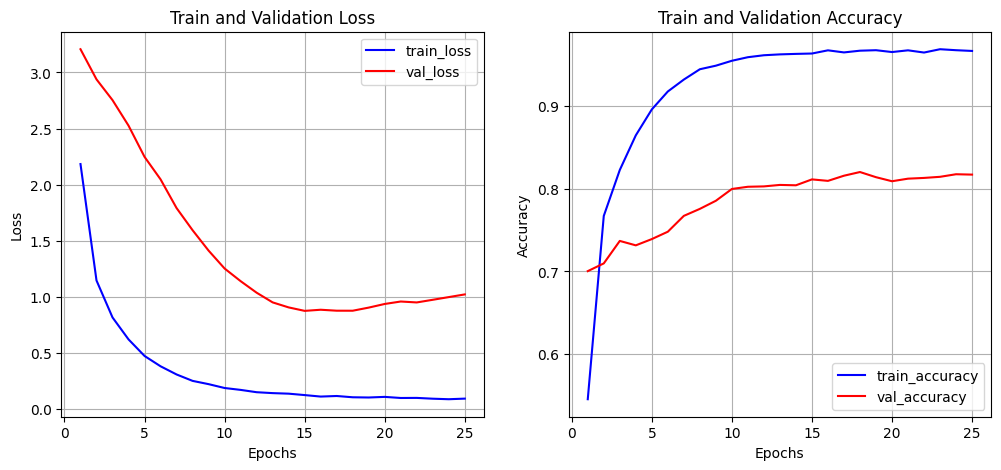

In [18]:
#plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [19]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 1s 13ms/step - loss: 0.9531 - accuracy: 0.7952


[0.9531017541885376, 0.7951914668083191]

# CIFAR 10

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [21]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 데이터를 훈련 세트와 검증 세트로 분할 (훈련 데이터의 25%를 검증 데이터로 사용)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.20, random_state=42)

In [22]:
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [23]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

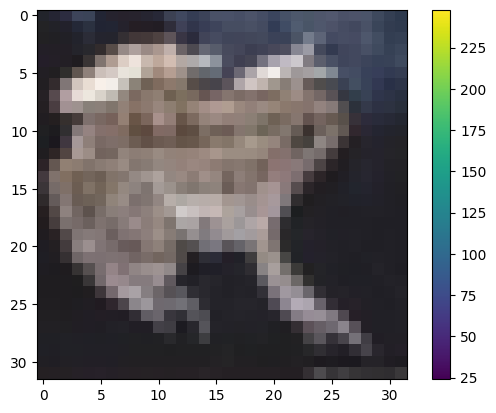

In [24]:

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [25]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [26]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape(-1,32*32*3)
x_val = x_val.reshape(-1,32*32*3)
x_test = x_test.reshape(-1,32*32*3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [27]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

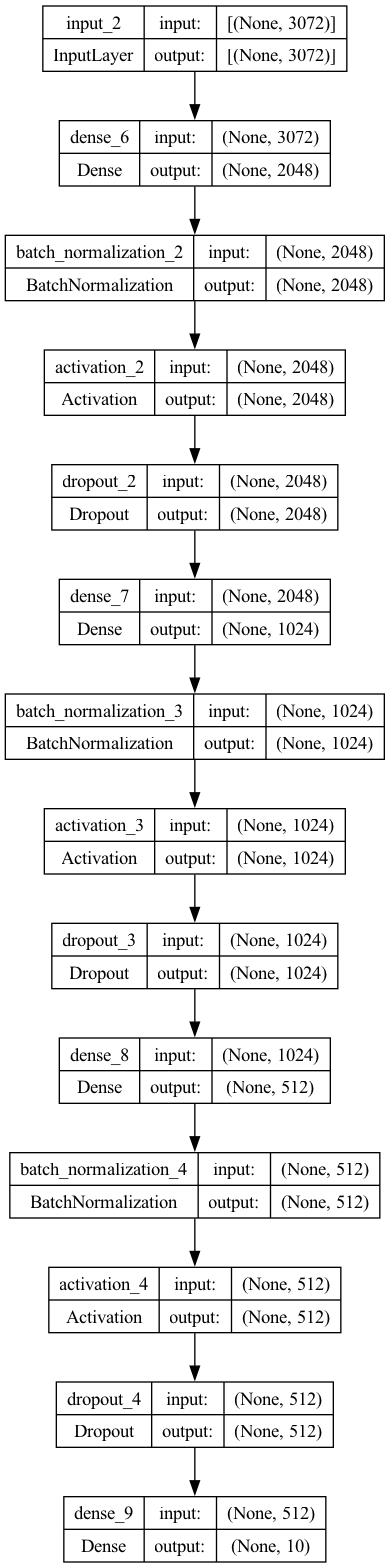

In [28]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model,Input
class cifar_model(Model):
    def __init__(self, **kwargs):
        super(cifar_model, self).__init__()
        self.d1 = layers.Dense(2048,activation ='relu')
        self.bn1 = layers.BatchNormalization()
        self.a1 = layers.Activation('relu')
        self.dp1 = layers.Dropout(rate=0.2)
        
        self.d2 = layers.Dense(1024,activation ='relu')
        self.bn2 = layers.BatchNormalization()
        self.a2 = layers.Activation('relu')
        self.dp2 = layers.Dropout(rate=0.2)

        self.d3 = layers.Dense(512,activation ='relu')
        self.bn3 = layers.BatchNormalization()
        self.a3 = layers.Activation('relu')
        self.dp3 = layers.Dropout(rate=0.2)
        
        self.out = layers.Dense(10,activation ='softmax')
    def call(self,x):
        x= self.d1(x)
        x= self.bn1(x)
        x = self.a1(x)
        x = self.dp1(x)
        
        x = self.d2(x)
        x = self.bn2(x)
        x = self.a2(x)
        x = self.dp2(x)

        x = self.d3(x)
        x = self.bn3(x)
        x = self.a3(x)
        x = self.dp3(x)
        
        x = self.out(x)

        return x

    def build_graph(self):
        return Model(inputs=[data], outputs=self.call(data))

model = cifar_model()
#model(data1,data2)
data = Input(shape=(3072))
model(data)

utils.plot_model(model.build_graph(), to_file="model.png",
        expand_nested=True, show_shapes=True) 

In [29]:
from tensorflow.keras import callbacks
check_point_cb = callbacks.ModelCheckpoint('cifar_model.tf', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "cifar_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2048)              6293504   
                                                                 
 batch_normalization_2 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 2048)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_3 (Bat  (None, 1024)              4096      
 chNormalization)                                      

In [30]:
history = model.fit(x_train,y_train,epochs=1000,batch_size = 100,validation_data=(x_val,y_val),callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/1000
398/400 [============================>.] - ETA: 0s - loss: 1.8558 - accuracy: 0.3402INFO:tensorflow:Assets written to: cifar_model.tf/assets


INFO:tensorflow:Assets written to: cifar_model.tf/assets


400/400 [==============================] - 10s 24ms/step - loss: 1.8547 - accuracy: 0.3406 - val_loss: 1.8024 - val_accuracy: 0.3633
Epoch 2/1000
400/400 [==============================] - ETA: 0s - loss: 1.6586 - accuracy: 0.4069INFO:tensorflow:Assets written to: cifar_model.tf/assets


INFO:tensorflow:Assets written to: cifar_model.tf/assets


400/400 [==============================] - 9s 23ms/step - loss: 1.6586 - accuracy: 0.4069 - val_loss: 1.7255 - val_accuracy: 0.3937
Epoch 3/1000
400/400 [==============================] - ETA: 0s - loss: 1.5881 - accuracy: 0.4331INFO:tensorflow:Assets written to: cifar_model.tf/assets


INFO:tensorflow:Assets written to: cifar_model.tf/assets


400/400 [==============================] - 9s 23ms/step - loss: 1.5881 - accuracy: 0.4331 - val_loss: 1.7076 - val_accuracy: 0.3889
Epoch 4/1000
400/400 [==============================] - 8s 21ms/step - loss: 1.5601 - accuracy: 0.4406 - val_loss: 1.8681 - val_accuracy: 0.3502
Epoch 5/1000
400/400 [==============================] - 8s 21ms/step - loss: 1.5306 - accuracy: 0.4523 - val_loss: 1.7967 - val_accuracy: 0.3690
Epoch 6/1000
400/400 [==============================] - ETA: 0s - loss: 1.5047 - accuracy: 0.4599INFO:tensorflow:Assets written to: cifar_model.tf/assets


INFO:tensorflow:Assets written to: cifar_model.tf/assets


400/400 [==============================] - 9s 23ms/step - loss: 1.5047 - accuracy: 0.4599 - val_loss: 1.6768 - val_accuracy: 0.3976
Epoch 7/1000
400/400 [==============================] - 8s 21ms/step - loss: 1.4815 - accuracy: 0.4727 - val_loss: 1.6787 - val_accuracy: 0.4050
Epoch 8/1000
399/400 [============================>.] - ETA: 0s - loss: 1.4617 - accuracy: 0.4747INFO:tensorflow:Assets written to: cifar_model.tf/assets


INFO:tensorflow:Assets written to: cifar_model.tf/assets


400/400 [==============================] - 9s 24ms/step - loss: 1.4618 - accuracy: 0.4747 - val_loss: 1.5966 - val_accuracy: 0.4276
Epoch 9/1000
400/400 [==============================] - 8s 21ms/step - loss: 1.4474 - accuracy: 0.4834 - val_loss: 1.7256 - val_accuracy: 0.3933
Epoch 10/1000
399/400 [============================>.] - ETA: 0s - loss: 1.4295 - accuracy: 0.4857INFO:tensorflow:Assets written to: cifar_model.tf/assets


INFO:tensorflow:Assets written to: cifar_model.tf/assets


400/400 [==============================] - 9s 23ms/step - loss: 1.4297 - accuracy: 0.4855 - val_loss: 1.5604 - val_accuracy: 0.4561
Epoch 11/1000
398/400 [============================>.] - ETA: 0s - loss: 1.4084 - accuracy: 0.4964INFO:tensorflow:Assets written to: cifar_model.tf/assets


INFO:tensorflow:Assets written to: cifar_model.tf/assets


400/400 [==============================] - 9s 23ms/step - loss: 1.4084 - accuracy: 0.4962 - val_loss: 1.5113 - val_accuracy: 0.4551
Epoch 12/1000
400/400 [==============================] - 9s 22ms/step - loss: 1.3908 - accuracy: 0.5000 - val_loss: 1.5347 - val_accuracy: 0.4606
Epoch 13/1000
400/400 [==============================] - 9s 21ms/step - loss: 1.3784 - accuracy: 0.5053 - val_loss: 1.7448 - val_accuracy: 0.3905
Epoch 14/1000
400/400 [==============================] - 9s 22ms/step - loss: 1.3648 - accuracy: 0.5094 - val_loss: 1.5716 - val_accuracy: 0.4429
Epoch 15/1000
400/400 [==============================] - 9s 22ms/step - loss: 1.3463 - accuracy: 0.5191 - val_loss: 1.5217 - val_accuracy: 0.4444
Epoch 16/1000
400/400 [==============================] - 9s 22ms/step - loss: 1.3338 - accuracy: 0.5207 - val_loss: 1.5219 - val_accuracy: 0.4531
Epoch 17/1000
400/400 [==============================] - 9s 21ms/step - loss: 1.3103 - accuracy: 0.5282 - val_loss: 1.5413 - val_accuracy:

INFO:tensorflow:Assets written to: cifar_model.tf/assets


400/400 [==============================] - 9s 23ms/step - loss: 1.2963 - accuracy: 0.5366 - val_loss: 1.5005 - val_accuracy: 0.4771
Epoch 19/1000
400/400 [==============================] - 8s 21ms/step - loss: 1.2800 - accuracy: 0.5399 - val_loss: 1.6879 - val_accuracy: 0.3972
Epoch 20/1000
400/400 [==============================] - ETA: 0s - loss: 1.2643 - accuracy: 0.5464INFO:tensorflow:Assets written to: cifar_model.tf/assets


INFO:tensorflow:Assets written to: cifar_model.tf/assets


400/400 [==============================] - 9s 23ms/step - loss: 1.2643 - accuracy: 0.5464 - val_loss: 1.4801 - val_accuracy: 0.4716
Epoch 21/1000
400/400 [==============================] - 9s 22ms/step - loss: 1.2455 - accuracy: 0.5544 - val_loss: 1.6641 - val_accuracy: 0.4314
Epoch 22/1000
400/400 [==============================] - 9s 23ms/step - loss: 1.2328 - accuracy: 0.5573 - val_loss: 1.6142 - val_accuracy: 0.4487
Epoch 23/1000
400/400 [==============================] - 8s 21ms/step - loss: 1.2157 - accuracy: 0.5610 - val_loss: 1.5653 - val_accuracy: 0.4590
Epoch 24/1000
400/400 [==============================] - 9s 22ms/step - loss: 1.1981 - accuracy: 0.5696 - val_loss: 1.6375 - val_accuracy: 0.4239
Epoch 25/1000
400/400 [==============================] - ETA: 0s - loss: 1.1827 - accuracy: 0.5791INFO:tensorflow:Assets written to: cifar_model.tf/assets


INFO:tensorflow:Assets written to: cifar_model.tf/assets


400/400 [==============================] - 9s 24ms/step - loss: 1.1827 - accuracy: 0.5791 - val_loss: 1.4225 - val_accuracy: 0.5036
Epoch 26/1000
400/400 [==============================] - 9s 21ms/step - loss: 1.1662 - accuracy: 0.5802 - val_loss: 1.4345 - val_accuracy: 0.4887
Epoch 27/1000
400/400 [==============================] - 9s 21ms/step - loss: 1.1510 - accuracy: 0.5862 - val_loss: 1.5896 - val_accuracy: 0.4531
Epoch 28/1000
400/400 [==============================] - 9s 22ms/step - loss: 1.1340 - accuracy: 0.5906 - val_loss: 1.4439 - val_accuracy: 0.4975
Epoch 29/1000
398/400 [============================>.] - ETA: 0s - loss: 1.1214 - accuracy: 0.5975INFO:tensorflow:Assets written to: cifar_model.tf/assets


INFO:tensorflow:Assets written to: cifar_model.tf/assets


400/400 [==============================] - 9s 23ms/step - loss: 1.1215 - accuracy: 0.5974 - val_loss: 1.4150 - val_accuracy: 0.5058
Epoch 30/1000
400/400 [==============================] - 9s 22ms/step - loss: 1.1046 - accuracy: 0.6049 - val_loss: 1.4551 - val_accuracy: 0.4992
Epoch 31/1000
400/400 [==============================] - 8s 21ms/step - loss: 1.0933 - accuracy: 0.6073 - val_loss: 1.5743 - val_accuracy: 0.4624
Epoch 32/1000
400/400 [==============================] - 8s 21ms/step - loss: 1.0800 - accuracy: 0.6115 - val_loss: 1.4655 - val_accuracy: 0.4901
Epoch 33/1000
400/400 [==============================] - ETA: 0s - loss: 1.0694 - accuracy: 0.6165INFO:tensorflow:Assets written to: cifar_model.tf/assets


INFO:tensorflow:Assets written to: cifar_model.tf/assets


400/400 [==============================] - 10s 24ms/step - loss: 1.0694 - accuracy: 0.6165 - val_loss: 1.4103 - val_accuracy: 0.5117
Epoch 34/1000
400/400 [==============================] - 8s 21ms/step - loss: 1.0529 - accuracy: 0.6204 - val_loss: 1.4821 - val_accuracy: 0.4858
Epoch 35/1000
400/400 [==============================] - 9s 22ms/step - loss: 1.0357 - accuracy: 0.6266 - val_loss: 1.4983 - val_accuracy: 0.4855
Epoch 36/1000
400/400 [==============================] - 9s 22ms/step - loss: 1.0233 - accuracy: 0.6310 - val_loss: 1.4547 - val_accuracy: 0.5079
Epoch 37/1000
400/400 [==============================] - ETA: 0s - loss: 1.0091 - accuracy: 0.6383INFO:tensorflow:Assets written to: cifar_model.tf/assets


INFO:tensorflow:Assets written to: cifar_model.tf/assets


400/400 [==============================] - 9s 23ms/step - loss: 1.0091 - accuracy: 0.6383 - val_loss: 1.4009 - val_accuracy: 0.5200
Epoch 38/1000
400/400 [==============================] - 9s 22ms/step - loss: 0.9970 - accuracy: 0.6399 - val_loss: 1.4426 - val_accuracy: 0.5021
Epoch 39/1000
400/400 [==============================] - 9s 21ms/step - loss: 0.9841 - accuracy: 0.6456 - val_loss: 1.4430 - val_accuracy: 0.5106
Epoch 40/1000
400/400 [==============================] - 8s 21ms/step - loss: 0.9610 - accuracy: 0.6550 - val_loss: 1.5555 - val_accuracy: 0.4881
Epoch 41/1000
400/400 [==============================] - 8s 20ms/step - loss: 0.9463 - accuracy: 0.6619 - val_loss: 1.4533 - val_accuracy: 0.5149
Epoch 42/1000
400/400 [==============================] - 8s 20ms/step - loss: 0.9330 - accuracy: 0.6645 - val_loss: 1.4395 - val_accuracy: 0.5157
Epoch 43/1000
400/400 [==============================] - 8s 20ms/step - loss: 0.9214 - accuracy: 0.6716 - val_loss: 1.4117 - val_accuracy:

In [31]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

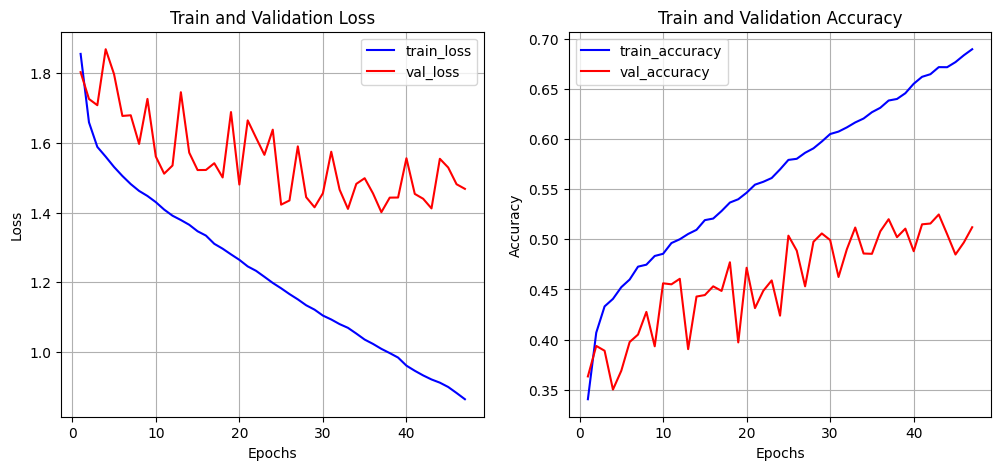

In [32]:
show_history(history)

In [33]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.3845 - accuracy: 0.5230


[1.3844748735427856, 0.5230000019073486]

In [34]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 [==============================] - 1s 4ms/step
[0.00613866 0.00789818 0.01764732 0.27311325 0.0154071  0.15787993
 0.4779967  0.03770813 0.00076667 0.00544403]
6
frog


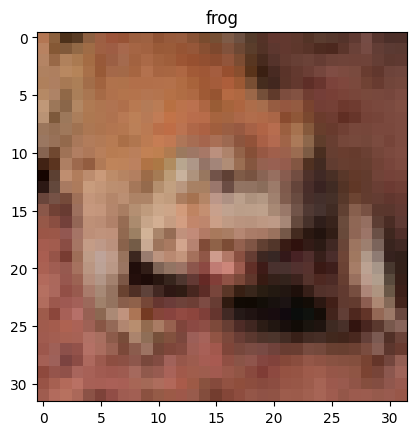

In [35]:
plt.imshow(x_test[5].reshape(32,32,3))
plt.title(class_names[arg_pred_y[5]])
plt.show()

In [36]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[int(y_test)]), color=color)

In [37]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[int(true_label)].set_color('blue')

/var/folders/1f/nd63my_54p70ccwh7d3cnt580000gn/T/ipykernel_42341/474557715.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_names[int(y_test)]), color=color)
/var/folders/1f/nd63my_54p70ccwh7d3cnt580000gn/T/ipykernel_42341/3552073410.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot[int(true_label)].set_color('blue')


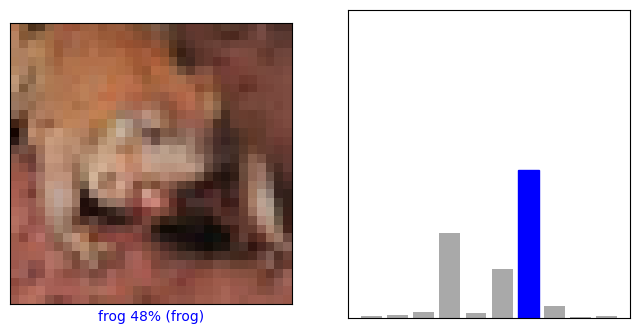

In [38]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1,32, 32,3))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

/var/folders/1f/nd63my_54p70ccwh7d3cnt580000gn/T/ipykernel_42341/474557715.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_names[int(y_test)]), color=color)
/var/folders/1f/nd63my_54p70ccwh7d3cnt580000gn/T/ipykernel_42341/3552073410.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot[int(true_label)].set_color('blue')


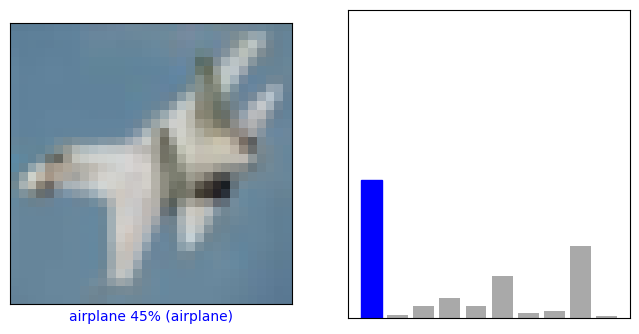

In [39]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 32, 32,3))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

/var/folders/1f/nd63my_54p70ccwh7d3cnt580000gn/T/ipykernel_42341/474557715.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_names[int(y_test)]), color=color)
/var/folders/1f/nd63my_54p70ccwh7d3cnt580000gn/T/ipykernel_42341/3552073410.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot[int(true_label)].set_color('blue')


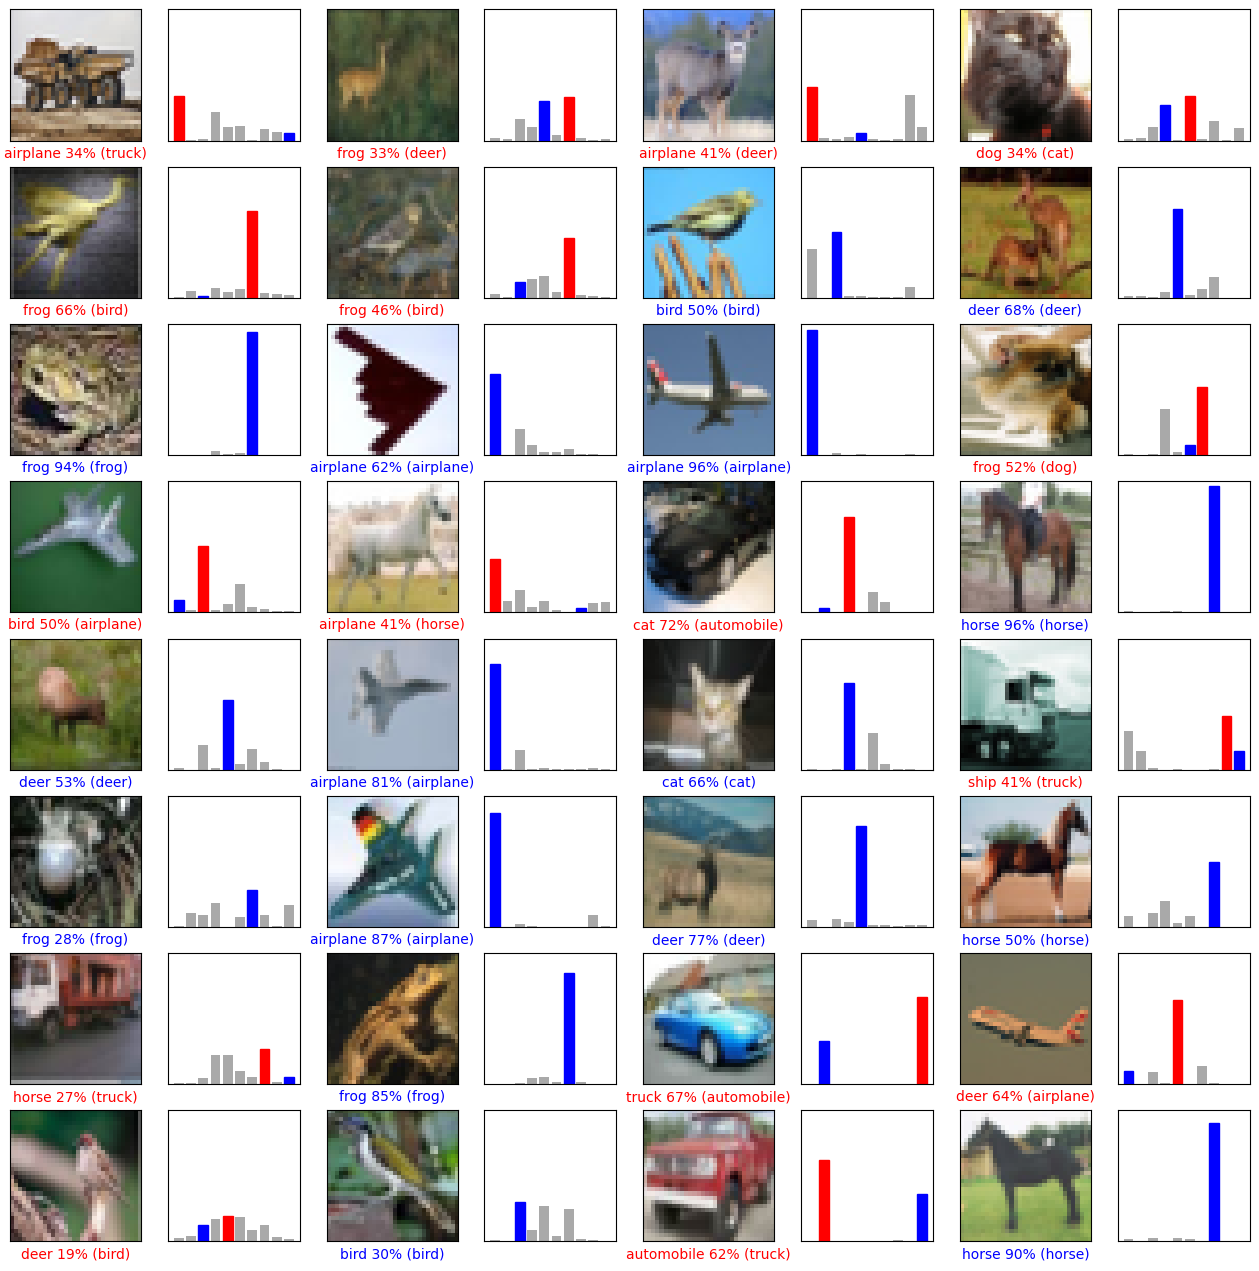

In [40]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 32, 32,3))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [41]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.51      0.71      0.59      1000
  automobile       0.63      0.65      0.64      1000
        bird       0.49      0.27      0.35      1000
         cat       0.34      0.42      0.38      1000
        deer       0.45      0.46      0.45      1000
         dog       0.45      0.43      0.44      1000
        frog       0.55      0.63      0.59      1000
       horse       0.64      0.51      0.57      1000
        ship       0.64      0.62      0.63      1000
       truck       0.60      0.53      0.56      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.53      0.52      0.52     10000



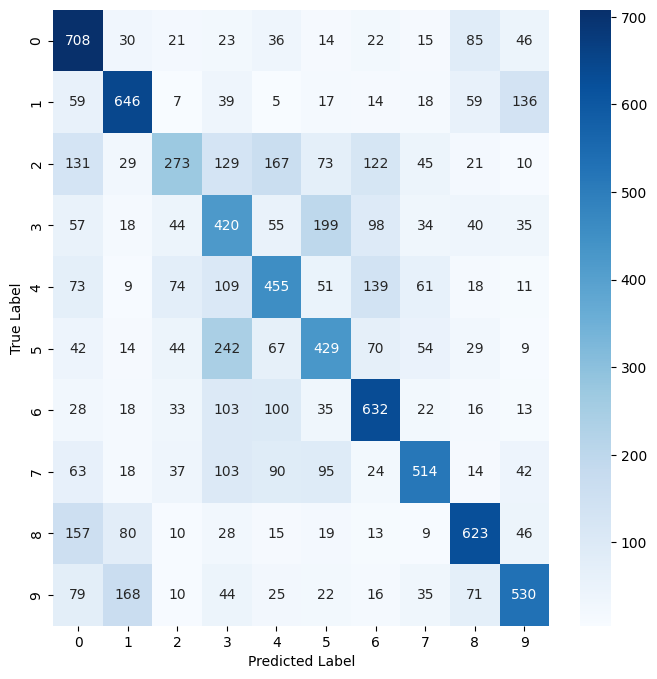

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()